In [1]:
import pandas as pd

In [2]:
df2=pd.read_csv("C:/Users/svel2/Downloads/indian_liver_patient - indian_liver_patient.csv")
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


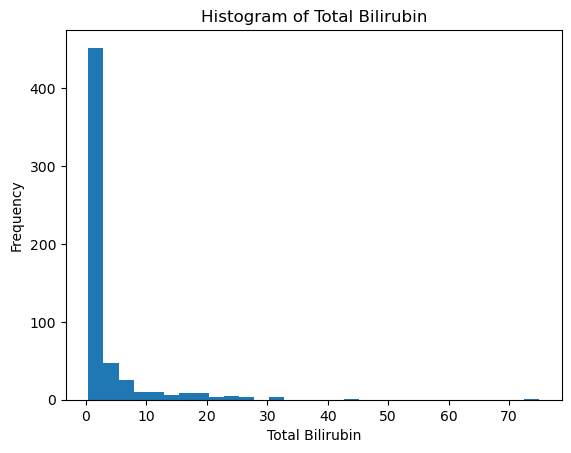

In [4]:
import matplotlib.pyplot as plt

plt.hist(df2['Total_Bilirubin'], bins=30)
plt.xlabel("Total Bilirubin")
plt.ylabel("Frequency")
plt.title("Histogram of Total Bilirubin")
plt.show()

In [5]:
df2.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df2.shape


(583, 11)

In [7]:
from sklearn.preprocessing import LabelEncoder

gender_enc = LabelEncoder()

df2['Gender'] = gender_enc.fit_transform(df2['Gender'])

In [8]:
df2.drop(
    ["Total_Protiens","Albumin_and_Globulin_Ratio"],axis=1,inplace=True
)

In [9]:
df2['Dataset'].value_counts()


Dataset
1    416
2    167
Name: count, dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Albumin                     583 non-null    float64
 8   Dataset                     583 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 41.1 KB


In [11]:
x = df2.drop("Dataset",axis=1)
y = df2['Dataset']

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [13]:
from sklearn.linear_model import LogisticRegression

lr_2=LogisticRegression()
lr_2.fit(x_train,y_train)

c:\Users\svel2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
pre=lr_2.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test,pre))
print("Precision:", precision_score(y_test,pre))
print("Recall:", recall_score(y_test,pre))
print("F1 Score:", f1_score(y_test,pre))

Accuracy: 0.7606837606837606
Precision: 0.7614678899082569
Recall: 0.9764705882352941
F1 Score: 0.8556701030927835


In [24]:
import pickle

with open('liver_model.pkl','wb') as fi:
  pickle.dump(liver_mode,fi)

with open('liver_enc1.pkl','wb') as el:
  pickle.dump(gender_enc,el)



with open('liver_model.pkl','rb') as fi:
  model_liv = pickle.load(fi)

with open('liver_enc1.pkl','rb') as el:
  liver_enc = pickle.load(el)